In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.getcwd()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content'

read in and visualize data

In [59]:
import numpy as np
import pandas as pd
# load data file
df = pd.read_csv('/content/gdrive/MyDrive/DataColab/PLV12_hi_gamma_3dmean_wide - RS.csv')
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['pre', 'CNO', 'post'])
# replace column names
df_melt.columns = ['Id', 'treatment', 'PLV']	
df_melt.head(10)

,Id,treatment,PLV
0,S1,pre,0.819273
1,S2,pre,0.817540
2,S3,pre,0.888873
3,S4,pre,0.868971
4,S5,pre,0.892928
5,S6,pre,0.886140
6,S1,CNO,0.845222
7,S2,CNO,0.840236
8,S3,CNO,0.865707
9,S4,CNO,0.897662


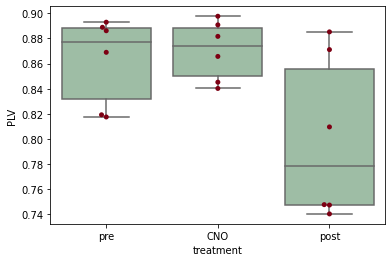

In [60]:
# generate a boxplot to see the data distribution by time points. Using boxplot, we can 
# boxplot helps detect the differences between different time points and find any outliers
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatment', y='PLV', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatment", y="PLV", data=df_melt, color='#7d0013')
plt.show()

In [61]:
# install pingouin as !pip install pingouin
#!pip install pingouin
import pingouin as pg
res = pg.rm_anova(dv='PLV', within='treatment', subject='Id', data=df_melt, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,treatment,0.017597,2,0.008799,8.447791,0.007106,0.366551,0.612756
1,Error,0.010415,10,0.001042,NaN,NaN,NaN,NaN


In [62]:
post_hocs = pg.pairwise_ttests(dv='PLV', within='treatment', subject='Id', padjust='fdr_bh', data=df_melt)
post_hocs

/usr/local/lib/python3.7/dist-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,treatment,CNO,post,True,True,3.031106,5.0,two-sided,0.029045,0.045995,fdr_bh,3.112,1.309591
1,treatment,CNO,pre,True,True,0.901161,5.0,two-sided,0.408810,0.408810,fdr_bh,0.512,0.244357
2,treatment,post,pre,True,True,-2.983862,5.0,two-sided,0.030663,0.045995,fdr_bh,2.99,-1.090332
